### Nearest Neighbour Regression and an Inverted U shape

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes["data"].shape

(442, 10)

In [2]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

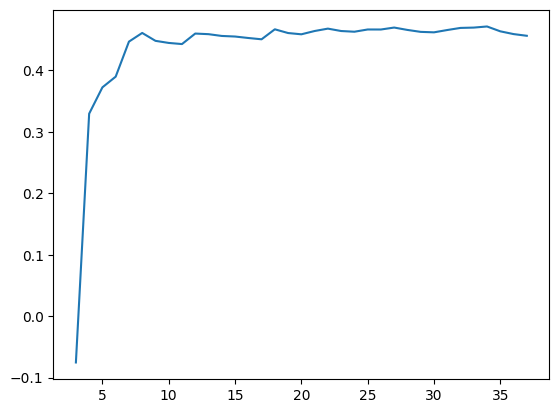

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(diabetes['data'], diabetes['target'], random_state=42)

K_max = 35
results = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors = k+1)
    knn.fit(X_train, Y_train)
    results[k] = knn.score(X_test, Y_test)
%matplotlib inline
plt.plot(np.arange(K_max)+3, results)

In [4]:
help(KNeighborsRegressor.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
        is the number of sample

### Using cross-validation to get an inverted U-shaped curve

In [5]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=3)
cross_val_score(knn, X_train, Y_train)

array([0.28743721, 0.24283699, 0.32312734, 0.32108514, 0.12845082])

In [6]:
from sklearn.utils import shuffle
X, Y = shuffle(diabetes["data"], diabetes["target"], random_state=42)
print(cross_val_score(knn, X, Y))

[0.36498737 0.32300369 0.26748019 0.43230668 0.40572547]


In [7]:
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.37222167132521977

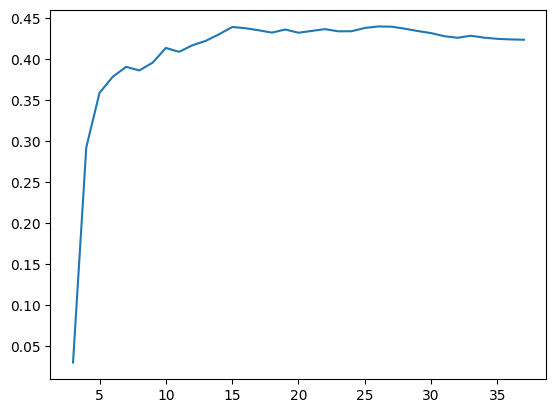

In [8]:
K_max = 35
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    results[k] = np.mean(cross_val_score(knn, X, Y))
plt.plot(np.arange(K_max)+3, results)    

Exercises
1. np.mean takes all accuracies of each fold in cross_val_score() and performs and average calculation on all the values to give a singular value that can be graphed.
2. For both calculations, the optimal K-value floats around the 20-30 range. It may even be argued that 10 would suffice. At large values of K, the accuracy of the predictor drops off drastically. Become less and less accurate as more neighbours are taken in to account.

### Learning Curves

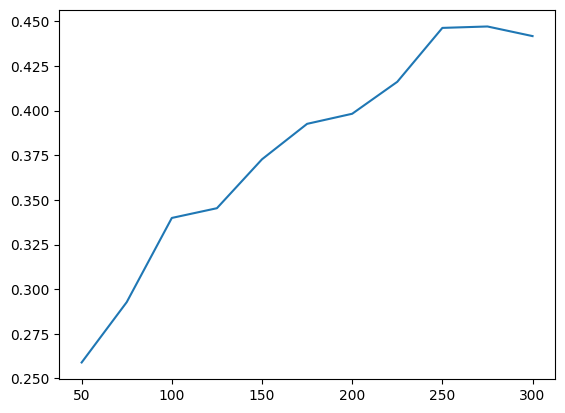

In [9]:
knn = KNeighborsRegressor(n_neighbors=10)
train_sizes = np.array([50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300])
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, Y_train, Y_test = train_test_split(diabetes["data"], diabetes["target"], train_size = train_sizes[k], random_state=42)
    knn.fit(X_train, Y_train)
    results[k] = knn.score(X_test, Y_test)
plt.plot(train_sizes, results)

Exercises <br>
3. The accuracy is more of a positive linear graph. <br>
4. The size of the test set would be 22. If only test_size was specified, train_size would be the complement of test_size on the size of the dataset. You can specify both and they do not have to add up to the size of the dataset. 

### Value at Risk

In [10]:
n = 99
L = 10**6 * np.random.random((n)) - 10**6/2
print(L)

[  65922.1999099  -457895.48303754 -304008.33917592 -429073.94147953
  244773.13641742  162562.10395629  157284.30675486  391385.15082257
  192708.41663258   13040.23147988 -433850.03934718  285701.32668387
 -486662.98980427  232412.65500513 -121506.32124583 -364612.57210957
 -203453.32714741   40492.00470941 -181498.32415667 -367959.60754015
  491974.48514982  348590.08959706   83715.48769727 -429896.53107894
 -214389.5663539   308247.26395334  153371.30028126  298372.73381471
  306771.67351612   46181.67344741  456689.68855559 -150105.9291947
   33787.52321007   56303.82844309 -451075.18339606   94139.74220831
  -73917.66745356   20847.95272094  -34879.41659521 -277597.05256904
  -74544.5264068    35580.46889994 -248303.37019428 -354439.67999264
  294796.21704481 -405385.50556517 -368143.84025485 -227120.03776037
  259567.15500801  268444.61212572  406225.85472881  -32258.32823494
   54239.29303335  191144.01111077  -33622.23054772  -84944.78035642
 -120958.61536565  192145.80445293 

In [11]:
sorted_L = np.sort(L)
VaR = sorted_L[-int(np.floor((n+1)/5))]
print(VaR)

279041.78391859063


In [12]:
import math
def VaR(L):
    if L.size >= 4:
        return np.sort(L)[-int(np.floor((n+1)/5))]
    else:
        return math.inf

### Validity of conformal prediction: an empirical test

In [13]:
N = 500
L = 10**6 * np.random.random_sample((N)) - 10**6/2

In [14]:
successes = np.empty(N)
for n in range(N):
    V = VaR(L[:n])
    if L[n] <= V:
        successes[n] = 1
    else:
        successes[n] = 0
print(np.mean(successes))
    

0.774


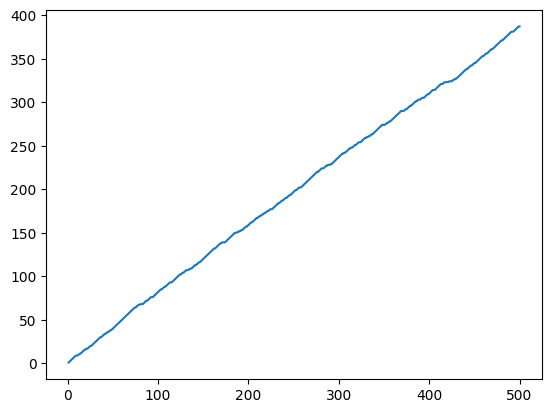

In [15]:
plt.plot(np.arange(N)+1, np.cumsum(successes))

Exercise <br>
5. cumsum is a cumulative sum where it takes the sum of all previous entries and current entry. 

### One more exercise

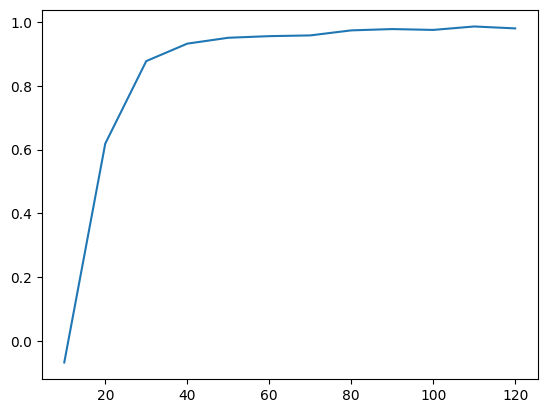

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()
K_max = 100
results = np.empty(K_max)
knn = KNeighborsRegressor(n_neighbors=10)
train_sizes = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120])
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, Y_train, Y_test = train_test_split(iris["data"], iris["target"], train_size = train_sizes[k], random_state=42)
    knn.fit(X_train, Y_train)
    results[k] = knn.score(X_test, Y_test)
plt.plot(train_sizes, results)
